# The Linear Threshold Model (LTM)

#### Introduction to the Linear Threshold Model (LTM)

The Linear Threshold Model (LTM) is a fundamental framework in the study of social computing, decision-making, and information diffusion. It helps researchers understand how behaviors, ideas, innovations, or information spread through a network of interconnected individuals or entities. Each node in this network represents an individual, and the edges between nodes signify social connections or interactions. By simulating the LTM, we can gain insights into the dynamics of influence and the conditions under which widespread adoption or diffusion occurs.

#### Historical Background and Theoretical Foundations

1. **Mark Granovetter’s Work**:
   - In 1978, sociologist Mark Granovetter introduced the concept of "threshold models of collective behavior." Granovetter's work focused on how individuals decide to participate in collective actions based on their personal thresholds, which are influenced by the number of others already participating. His threshold model laid the groundwork for understanding how individual decisions aggregate to produce collective phenomena.
   - Granovetter emphasized the importance of weak ties (connections between individuals who are not closely connected) in social networks. He argued that weak ties play a crucial role in the spread of information and innovations because they bridge otherwise disconnected groups.

2. **Duncan Watts’ Contributions**:
   - In the early 2000s, sociologist Duncan Watts extended Granovetter's ideas by applying them to network theory and complex systems. Watts and his collaborators developed models to study how network structure affects the dynamics of social influence and information diffusion.
   - One of Watts' key contributions was the exploration of how small-world networks (characterized by high clustering and short average path lengths) facilitate rapid and widespread diffusion. He demonstrated that even a few long-range connections (weak ties) can significantly enhance the speed and reach of information spread.

#### Relation to Percolation Theory

- **Percolation Theory**:
  - Percolation theory is a mathematical framework used to study the movement and filtering of fluids through porous materials. It has been adapted to study the spread of information, diseases, and behaviors in networks.
  - In the context of social networks, percolation theory helps explain how a critical mass of initial adopters or influencers can lead to a cascade of activation, similar to how a fluid percolates through a medium once a certain density of connections is reached.

- **Connection to LTM**:
  - The LTM can be viewed through the lens of percolation theory. The activation of nodes in the LTM corresponds to the percolation of influence through the network. The threshold values of nodes represent the critical points at which percolation occurs.
  - Just as percolation theory identifies the conditions under which a fluid will spread through a material, the LTM identifies the conditions under which information or behavior will spread through a network.

#### The Linear Threshold Model: Mechanisms and Process

1. **Nodes and Edges**:
   - Nodes represent individuals or entities in the network.
   - Edges represent the connections or interactions between these nodes.

2. **Initial State**:
   - Each node begins in either an active (influenced) or inactive (uninfluenced) state. The initial state can be determined based on certain conditions or assigned randomly.

3. **Thresholds**:
   - Each node has a threshold value, which is a fraction representing the proportion of its neighbors that need to be active for the node to become active. This threshold reflects the node's susceptibility to influence.

4. **Activation Rule**:
   - The activation rule determines whether a node becomes active based on the state of its neighbors. Specifically, a node becomes active if the fraction of its active neighbors meets or exceeds its threshold value.

5. **Propagation and Iteration**:
   - The model iteratively updates the state of each node based on the activation rule. Nodes evaluate the fraction of their active neighbors, and if this fraction is greater than or equal to their threshold, they become active in the next step.
   - This process continues until the network reaches a stable state where no more nodes change their state, or a predefined maximum number of steps is reached.

#### High-Level Intuitive Explanation of the Simulation

1. **Initialization**:
   - We start with a network of nodes, each with an initial state (active or inactive) and a threshold value. The network is represented by an adjacency matrix indicating the connections between nodes.

2. **Fraction of Activated Neighbors**:
   - At each iteration, each node calculates the fraction of its neighbors that are active. This is done by summing the states of its neighbors and dividing by the number of neighbors.

3. **Threshold Comparison and Activation**:
   - Each node compares the fraction of its active neighbors to its threshold value. If the fraction exceeds the threshold, the node becomes active.

4. **Iteration and Convergence**:
   - The simulation iteratively updates the states of the nodes. The process continues until no more nodes change their state or a maximum number of iterations is reached. This allows us to observe how influence spreads through the network over time.

5. **Outcome and Analysis**:
   - The final state of the network shows which nodes have become active. By running multiple simulations with different initial conditions and network structures, we can analyze the conditions that lead to widespread activation (cascade) and those that do not.

#### Applications and Insights

- **Social Computing**:
  - The LTM helps understand how social behaviors and trends spread through social networks. It can model scenarios such as the adoption of new technologies, spreading of news, or viral marketing campaigns.

- **Decision Making**:
  - The LTM can be used to study collective decision-making processes where individuals' choices are influenced by their peers. It provides insights into how opinions or decisions propagate within groups.

- **Information Diffusion**:
  - The LTM is valuable for analyzing the spread of information in networks, such as the dissemination of scientific knowledge, rumors, or public health messages. It helps identify key influencers and critical thresholds for effective information spread.

By simulating the LTM on various network structures, researchers can gain valuable insights into the dynamics of influence and information propagation. This understanding can guide strategies for maximizing or controlling the spread of information in real-world networks, enhancing our ability to manage social behaviors, marketing campaigns, public health initiatives, and more.

Running Monte Carlo Simulations: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]


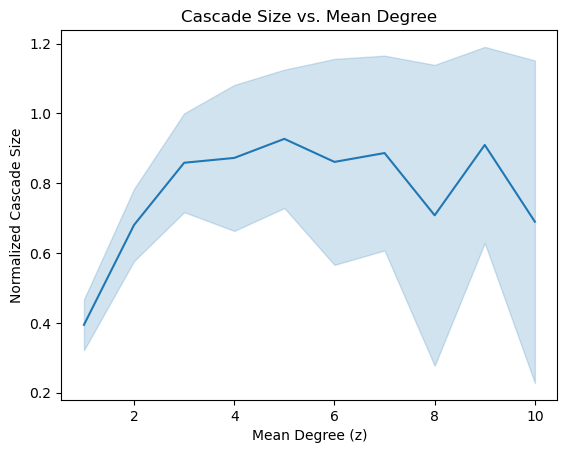

In [10]:
import torch
import torch.nn.functional as F
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

class LinearThresholdModel:
    def __init__(self, adjacency_matrix, thresholds):
        """
        Initializes the Linear Threshold Model.
        
        Parameters:
        adjacency_matrix (torch.Tensor): The adjacency matrix of the graph (shape: num_nodes x num_nodes).
        thresholds (torch.Tensor): The threshold values for each node (shape: num_nodes).
        """
        self.adjacency_matrix = adjacency_matrix
        self.thresholds = thresholds
        self.num_nodes = adjacency_matrix.shape[0]
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        self.adjacency_matrix = self.adjacency_matrix.to(self.device)
        self.thresholds = self.thresholds.to(self.device)

    def step(self, states):
        """
        Perform a single step of the LTM update.

        Parameters:
        states (torch.Tensor): The current states of the nodes (shape: num_nodes).

        Returns:
        torch.Tensor: The updated states of the nodes (shape: num_nodes).
        """
        neighbor_counts = torch.matmul(self.adjacency_matrix, torch.ones_like(states).float())
        activation_potential = torch.matmul(self.adjacency_matrix, states.float())
        fraction_active = activation_potential / neighbor_counts
        new_states = (fraction_active >= self.thresholds).float()
        return new_states

    def run(self, initial_states, max_steps=100):
        """
        Run the LTM until convergence or for a maximum number of steps.

        Parameters:
        initial_states (torch.Tensor): The initial states of the nodes (shape: num_nodes).
        max_steps (int): The maximum number of steps to run the simulation.

        Returns:
        torch.Tensor: The final states of the nodes (shape: num_nodes).
        """
        states = initial_states.to(self.device)
        for _ in range(max_steps):
            new_states = self.step(states)
            if torch.equal(states, new_states):
                break
            states = new_states
        return states.cpu()

def generate_random_graph(num_nodes, mean_degree):
    """
    Generate a random adjacency matrix for an unweighted, undirected graph with a given mean degree.

    Parameters:
    num_nodes (int): The number of nodes in the graph.
    mean_degree (float): The mean degree of the nodes in the graph.

    Returns:
    torch.Tensor: The adjacency matrix of the graph.
    """
    prob = mean_degree / (num_nodes - 1)
    adjacency_matrix = (torch.rand(num_nodes, num_nodes) < prob).float()
    adjacency_matrix.fill_diagonal_(0)
    adjacency_matrix = torch.triu(adjacency_matrix) + torch.triu(adjacency_matrix, 1).T
    return adjacency_matrix

def run_single_simulation(adjacency_matrix, thresholds, initial_states):
    """
    Run a single LTM simulation.

    Parameters:
    adjacency_matrix (torch.Tensor): The adjacency matrix of the graph.
    thresholds (torch.Tensor): The threshold values for each node.
    initial_states (torch.Tensor): The initial states of the nodes.

    Returns:
    float: The normalized cascade size.
    """
    model = LinearThresholdModel(adjacency_matrix, thresholds)
    final_states = model.run(initial_states)
    cascade_size = final_states.sum().item() / adjacency_matrix.shape[0]
    return cascade_size

def monte_carlo_simulation(num_nodes, mean_degrees, num_simulations, threshold_mean=0.5, max_workers=None):
    """
    Perform Monte Carlo simulations for varying mean degrees and calculate the cascade sizes.

    Parameters:
    num_nodes (int): The number of nodes in the graph.
    mean_degrees (list): The list of mean degrees to simulate.
    num_simulations (int): The number of simulations for each mean degree.
    threshold_mean (float): The mean value for the thresholds of the nodes.
    max_workers (int): The maximum number of workers to use in parallel.

    Returns:
    dict: A dictionary with mean degrees as keys and lists of cascade sizes as values.
    """
    results = {z: [] for z in mean_degrees}
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = []
        for z in tqdm(mean_degrees, desc='Running Monte Carlo Simulations'):
            adjacency_matrices = [generate_random_graph(num_nodes, z) for _ in range(num_simulations)]
            thresholds = torch.full((num_nodes,), threshold_mean)
            initial_states = [torch.randint(0, 2, (num_nodes,)).float() for _ in range(num_simulations)]
            
            for adj_matrix, init_states in zip(adjacency_matrices, initial_states):
                futures.append(executor.submit(run_single_simulation, adj_matrix, thresholds, init_states))
        
        for future in tqdm(as_completed(futures), total=len(futures), desc='Collecting results'):
            try:
                cascade_size = future.result()
                z = futures.index(future) // num_simulations
                results[mean_degrees[z]].append(cascade_size)
            except Exception as e:
                print(f"An error occurred: {e}")
    
    return results

def plot_results(results):
    """
    Plot the Monte Carlo simulation results using seaborn.

    Parameters:
    results (dict): A dictionary with mean degrees as keys and lists of cascade sizes as values.
    """
    data = []
    for z, cascades in results.items():
        for cascade in cascades:
            data.append({'Mean Degree': z, 'Cascade Size': cascade})
    
    df = pd.DataFrame(data)
    sns.lineplot(x='Mean Degree', y='Cascade Size', data=df, errorbar='sd')
    plt.xlabel('Mean Degree (z)')
    plt.ylabel('Normalized Cascade Size')
    plt.title('Cascade Size vs. Mean Degree')
    plt.grid(False)
    plt.show()

if __name__ == '__main__':
    num_nodes = 100
    mean_degrees = np.linspace(1, 10, 10)
    num_simulations = 50
    
    results = monte_carlo_simulation(num_nodes, mean_degrees, num_simulations)
    plot_results(results)
